In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import os
import random

In [2]:
def seed_torch(seed=12345):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

In [3]:
from difFOCI.conditional_dependence import conditional_dependence as T
b, c_1, c_2, c_3, d, e = [], [], [], [], [], []

seed_torch()
for i in range(50):
    n = 1000
    p = 10
    x = np.random.normal(0, 1, (n, p))
    y = np.sin(x[:, 0]) + np.sin(x[:, 1]) + np.sin(x[:, 2])

    # all three
    b.append(T(y=y.squeeze(), z=np.vstack((np.sin(x[:, 0]), np.sin(x[:, 1]), np.sin(
        x[:, 2]))).T)-T(y=y.squeeze(), z=np.vstack((x[:, 0], x[:, 1], x[:, 2])).T))

    # first + second, third
    c_1.append(T(y=y.squeeze(), z=np.vstack((np.sin(x[:, 0])+np.sin(x[:, 1]), np.sin(
        x[:, 2]))).T)-T(y=y.squeeze(), z=np.vstack((x[:, 0]+x[:, 1], x[:, 2])).T))
    c_2.append(T(y=y.squeeze(), z=np.vstack((np.sin(x[:, 0])+np.sin(x[:, 2]), np.sin(
        x[:, 1]))).T)-T(y=y.squeeze(), z=np.vstack((x[:, 0]+x[:, 2], x[:, 1])).T))
    c_3.append(T(y=y.squeeze(), z=np.vstack((np.sin(x[:, 1])+np.sin(x[:, 2]), np.sin(
        x[:, 0]))).T)-T(y=y.squeeze(), z=np.vstack((x[:, 1]+x[:, 2], x[:, 0])).T))

    # first + second + third
    d.append(T(y=y.squeeze(), z=((np.sin(x[:, 0])+np.sin(x[:, 1])+np.sin(x[:, 2]))).T)-T(
        y=y.squeeze(), z=((x[:, 0]+x[:, 1] + x[:, 2])).T))

    # a_3.append three - three separately
    e.append(T(y=y.squeeze(), z=((np.sin(x[:, 0])+np.sin(x[:, 1])+np.sin(x[:, 2]))).T)-T(
        y=y.squeeze(), z=np.vstack((np.sin(x[:, 0]), np.sin(x[:, 1]), np.sin(x[:, 2]))).T))

means, stds = [], []
for arr in c_1, c_2, c_3, b, d, e:
    means.append(np.mean(np.array(arr)))
    stds.append(np.std(np.array(arr)))

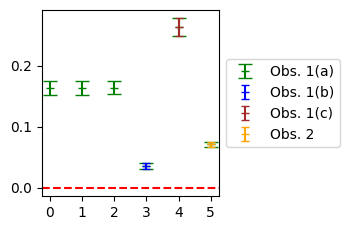

In [6]:
# Plot: mean with standard deviations as errorbars
scale = 0.4
plt.figure(figsize=(scale*9, scale*6))
plt.errorbar(np.arange(len(means)), means, yerr=stds, label='Obs. 1(a)',color='green', fmt='_', capsize=3)
plt.errorbar(np.array([3]), means[3], yerr=stds[3], label='Obs. 1(b)',color='blue', fmt='_', capsize=3)
plt.errorbar(np.array([4]), means[4], yerr=stds[4], label='Obs. 1(c)',color='brown', fmt='_', capsize=3)
plt.errorbar(np.array([5]), means[5], yerr=stds[5], label='Obs. 2',color='orange', fmt='_', capsize=3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks([0,1,2,3,4,5])
plt.tight_layout()
plt.savefig('errorbar.png')
plt.savefig('errorbar.pdf')
plt.show()